In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 500)
pd.set_option('display.max_rows', 50)

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 5)})
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

## 데이터 로드 및 분류, 이상치 조정

In [2]:
mes_full_df=pd.read_csv('../dataset/sfites_real_mix_data_full.csv')

### 데이터 분류 및 점검

In [3]:
mes_c1_df = mes_full_df[mes_full_df['RUBBER'].str[-2:]=='C1']
mes_f1_df = mes_full_df[mes_full_df['RUBBER'].str[-2:]!='C1']

In [4]:
mes_f1_c1_df = mes_f1_df[mes_f1_df['1_JRCODE'].str[-2:]=='C1']
mes_f1_noC1_df = mes_f1_df[mes_f1_df['1_JRCODE'].str[-2:]!='C1']

# 원본 데이터프레임(df)에서 "RUBBER" 값이 c1_filtered_df의 "" 값과 일치하는 행만 선택
matching_df = mes_full_df[mes_full_df['RUBBER'].isin(mes_f1_c1_df['1_JRCODE'].unique())]
# 10개 이상의 데이터를 가진 그룹만 필터링
group_counts = matching_df['RUBBER'].value_counts()
trg_mes_f1_remove_jrcode_ls = group_counts[group_counts < 10].index
trg_mes_f1_remove_df = mes_f1_c1_df[mes_f1_c1_df['1_JRCODE'].isin(trg_mes_f1_remove_jrcode_ls)]

trg_mes_f1_c1_jrcode_ls = group_counts[group_counts >= 10].index
trg_mes_f1_c1_df = mes_f1_c1_df[mes_f1_c1_df['1_JRCODE'].isin(trg_mes_f1_c1_jrcode_ls)]

trg_mes_f1_wo_c1_df = mes_f1_c1_df[~(mes_f1_c1_df['1_JRCODE'].isin(group_counts.index))]

In [5]:
print(f"1. 총 데이터 수 : {len(mes_full_df):,}")
print(f"2. f1 데이터 수 : {len(mes_f1_df):,} // 3. C1 데이터 수 : {len(mes_c1_df):,} // 2+3. 합 : {(len(mes_f1_df) + len(mes_c1_df)):,}")
print(f"4. f1 중 C1이 필요한 데이터 수 : {len(mes_f1_c1_df):,} // 5. f1 중 C1이 필요없는 데이터 수 : {len(mes_f1_noC1_df):,} // 4/5. 합 : {(len(mes_f1_c1_df) + len(mes_f1_noC1_df)):,}")
print(f"6. f1 중 C1이 필요한 데이터에서 C1이 10개 미만인 데이터의 수 : {len(trg_mes_f1_remove_df):,}")
print(f"7. f1 중 C1이 필요한 데이터에서 매칭되는 C1이 없는 데이터의 수 : {len(trg_mes_f1_wo_c1_df):,}")
print(f"8. f1 중 C1이 필요한 데이터에서 C1이 10개 이상인 데이터의 수 : {len(trg_mes_f1_c1_df):,}")
print(f"4. f1 중 C1이 필요한 데이터 수 : {len(mes_f1_c1_df):,} // 6+7+8. 합 수 : {(len(trg_mes_f1_remove_df)+len(trg_mes_f1_c1_df)+len(trg_mes_f1_wo_c1_df)):,}")

1. 총 데이터 수 : 516,690
2. f1 데이터 수 : 262,765 // 3. C1 데이터 수 : 253,925 // 2+3. 합 : 516,690
4. f1 중 C1이 필요한 데이터 수 : 259,310 // 5. f1 중 C1이 필요없는 데이터 수 : 3,455 // 4/5. 합 : 262,765
6. f1 중 C1이 필요한 데이터에서 C1이 10개 미만인 데이터의 수 : 4,016
7. f1 중 C1이 필요한 데이터에서 매칭되는 C1이 없는 데이터의 수 : 22,393
8. f1 중 C1이 필요한 데이터에서 C1이 10개 이상인 데이터의 수 : 232,901
4. f1 중 C1이 필요한 데이터 수 : 259,310 // 6+7+8. 합 수 : 259,310


In [6]:
tmp_df = mes_c1_df[mes_c1_df['1_JRCODE'].str[-2:]=='C1']
pd.concat((tmp_df.iloc[:,:5],tmp_df.iloc[:,100:]),axis=1)
print(f"C1 데이터 수 : {len(mes_c1_df):,}")
print(f"C1 데이터 중 1_JRCODE가 자기 자신인 데이터 수 : {(tmp_df['RUBBER']==tmp_df['1_JRCODE']).sum()}")
print(f"C1 데이터 중 1_JRCODE가 자기 자신이 아닌 데이터 수 : {(tmp_df['RUBBER']!=tmp_df['1_JRCODE']).sum()}")
print(f"C1 데이터 중 1_JRCODE가 자기 자신이 아닌 데이터의 1_JRCODE 변수의 RUBBER ID들 : {tmp_df[(tmp_df['RUBBER']!=tmp_df['1_JRCODE'])]['1_JRCODE'].unique()}")

# C1중 1_JRCODE가 자기 자신 또는 원재료코드가 아닌 경우 제외
mes_c1_df = mes_c1_df[mes_c1_df['1_JRCODE'].str[-2:]!='C1']
mes_c1_df.reset_index(drop=True, inplace=True)

C1 데이터 수 : 253,925
C1 데이터 중 1_JRCODE가 자기 자신인 데이터 수 : 222
C1 데이터 중 1_JRCODE가 자기 자신이 아닌 데이터 수 : 63
C1 데이터 중 1_JRCODE가 자기 자신이 아닌 데이터의 1_JRCODE 변수의 RUBBER ID들 : ['4450-Y1.00-C1' '2000-R1.00-C1']


### phr 상대적 값으로 조정

In [7]:
phr_cols = ['1_PHR','2_PHR','3_PHR','4_PHR','5_PHR','6_PHR','7_PHR','8_PHR','9_PHR','10_PHR','11_PHR','12_PHR','13_PHR','14_PHR','15_PHR','16_PHR','17_PHR','18_PHR','19_PHR','20_PHR','21_PHR']
mes_c1_df[phr_cols] = mes_c1_df[phr_cols].apply(lambda x: x / x.max() * 100, axis=1)
mes_c1_df.head()

,LOTNO,RUBBER,MECHCD,RPM1,RPM2,RPM3,RPM4,RPM5,RPM6,RPM7,RPM8,RPM9,RPM10,RPM11,RPM12,RPM13,RPM14,RPM15,RPM16,RPM17,RPM18,RPM19,RPM20,TEMP1,TEMP2,TEMP3,TEMP4,TEMP5,TEMP6,TEMP7,TEMP8,TEMP9,TEMP10,TEMP11,TEMP12,TEMP13,TEMP14,TEMP15,TEMP16,TEMP17,TEMP18,TEMP19,TEMP20,TIME1,TIME2,TIME3,TIME4,TIME5,TIME6,TIME7,TIME8,TIME9,TIME10,TIME11,TIME12,TIME13,TIME14,TIME15,TIME16,TIME17,TIME18,TIME19,TIME20,JUK1,JUK2,JUK3,JUK4,JUK5,JUK6,JUK7,JUK8,JUK9,JUK10,JUK11,JUK12,JUK13,JUK14,JUK15,JUK16,JUK17,JUK18,JUK19,JUK20,HS,HS_RESULT,SG,SG_RESULT,TS,TS_RESULT,EB,EB_RESULT,MNY,MNY_RESULT,REHO_MIN,REHO_MAX,REHO_TS2,REHO_TC90,REHO_RESULT,SCR,SCR_RESULT,1_JRCODE,2_JRCODE,3_JRCODE,4_JRCODE,5_JRCODE,6_JRCODE,7_JRCODE,8_JRCODE,9_JRCODE,10_JRCODE,11_JRCODE,12_JRCODE,13_JRCODE,14_JRCODE,15_JRCODE,16_JRCODE,17_JRCODE,18_JRCODE,19_JRCODE,20_JRCODE,21_JRCODE,1_PHR,2_PHR,3_PHR,4_PHR,5_PHR,6_PHR,7_PHR,8_PHR,9_PHR,10_PHR,11_PHR,12_PHR,13_PHR,14_PHR,15_PHR,16_PHR,17_PHR,18_PHR,19_PHR,20_PHR,21_PHR,1_PUTGB,2_PUTGB,3_PUTGB,4_PUTGB,5_PUTGB,6_PUTGB,7_PUTGB,8_PUTGB,9_PUTGB,10_PUTGB,11_PUTGB,12_PUTGB,13_PUTGB,14_PUTGB,15_PUTGB,16_PUTGB,17_PUTGB,18_PUTGB,19_PUTGB,20_PUTGB,21_PUTGB,1_PUTORDER,2_PUTORDER,3_PUTORDER,4_PUTORDER,5_PUTORDER,6_PUTORDER,7_PUTORDER,8_PUTORDER,9_PUTORDER,10_PUTORDER,11_PUTORDER,12_PUTORDER,13_PUTORDER,14_PUTORDER,15_PUTORDER,16_PUTORDER,17_PUTORDER,18_PUTORDER,19_PUTORDER,20_PUTORDER,21_PUTORDER,HS_TIME,SG_TIME,TS_TIME,EB_TIME,HS_TEMP,SG_TEMP,TS_TEMP,EB_TEMP,MNY_TIME,MNY_TEMP,REHO_TIME,REHO_TEMP,SCR_TIME,SCR_TEMP
0,G0116I130012001,1572-N2.02-C1,B-1-01,1195.0,1204.0,1203.0,1204.0,1204.0,1204.0,1204.0,1210.0,1204.0,1203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.4,60.8,75.3,69.7,107.9,106.3,129.8,136.7,165.3,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,23.3,24.5,23.7,34.4,18.3,24.4,6.5,27.9,16.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,434.0,28.0,43.0,86.0,11.0,62.0,34.0,8.0,71.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EE017,EE011,CB001,CB011,CC001,CC012,CD013,CD023,CB003,FF001,NN045,OP004,NN045,OP004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,28.698980,0.956633,0.956633,0.478316,0.956633,1.441327,0.478316,4.719388,26.530612,44.515306,24.196429,22.066327,11.696429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,G0116H310001002,1703-T2.01-C1,B-1-01,1011.0,1020.0,1021.0,1021.0,1020.0,1020.0,1021.0,1022.0,1017.0,1027.0,1021.0,1020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.1,74.6,69.8,80.9,76.3,68.8,87.5,89.3,139.4,143.5,174.1,165.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.7,22.4,10.4,34.4,26.7,30.7,24.5,8.0,48.3,7.0,36.3,16.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,36.0,4.0,80.0,131.0,132.0,80.0,48.0,107.0,26.0,78.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EE017,CB001,CC001,CC012,CB003,FF001,NN550,NN550,OP008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.663265,1.326531,0.994898,3.954082,36.224490,47.831633,66.326531,39.706633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,G0116H310012001,1700-H1.01-C1,B-1-01,1203.0,1205.0,1204.0,1204.0,1204.0,1206.0,1206.0,1019.0,1026.0,920.0,920.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.2,56.1,57.6,54.1,53.5,79.5,82.7,108.5,114.1,168.8,157.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.8,13.9,39.6,16.1,24.8,19.7,8.6,24.4,6.5,56.8,16.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,648.0,15.0,87.0,45.0,44.0,47.0,11.0,56.0,11.0,160.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EE011,EE002,CB001,CB011,CD013,CC0

## 최종 데이터 저장

In [13]:
basic_cols = ['LOTNO','RUBBER']
# 변수명 조정 필요
# ========================================================
rpm_cols = ['RPM1','RPM2','RPM3','RPM4','RPM5','RPM6','RPM7','RPM8','RPM9','RPM10','RPM11','RPM12','RPM13','RPM14','RPM15','RPM16','RPM17','RPM18','RPM19','RPM20']
temp_cols = ['TEMP1','TEMP2','TEMP3','TEMP4','TEMP5','TEMP6','TEMP7','TEMP8','TEMP9','TEMP10','TEMP11','TEMP12','TEMP13','TEMP14','TEMP15','TEMP16','TEMP17','TEMP18','TEMP19','TEMP20']
time_cols = ['TIME1','TIME2','TIME3','TIME4','TIME5','TIME6','TIME7','TIME8','TIME9','TIME10','TIME11','TIME12','TIME13','TIME14','TIME15','TIME16','TIME17','TIME18','TIME19','TIME20']
juk_cols = ['JUK1','JUK2','JUK3','JUK4','JUK5','JUK6','JUK7','JUK8','JUK9','JUK10','JUK11','JUK12','JUK13','JUK14','JUK15','JUK16','JUK17','JUK18','JUK19','JUK20']
jrcode_cols = ['1_JRCODE','2_JRCODE','3_JRCODE','4_JRCODE','5_JRCODE','6_JRCODE','7_JRCODE','8_JRCODE','9_JRCODE','10_JRCODE','11_JRCODE','12_JRCODE','13_JRCODE','14_JRCODE','15_JRCODE','16_JRCODE','17_JRCODE','18_JRCODE','19_JRCODE','20_JRCODE','21_JRCODE']
phr_cols = ['1_PHR','2_PHR','3_PHR','4_PHR','5_PHR','6_PHR','7_PHR','8_PHR','9_PHR','10_PHR','11_PHR','12_PHR','13_PHR','14_PHR','15_PHR','16_PHR','17_PHR','18_PHR','19_PHR','20_PHR','21_PHR']
putgb_cols = ['1_PUTGB','2_PUTGB','3_PUTGB','4_PUTGB','5_PUTGB','6_PUTGB','7_PUTGB','8_PUTGB','9_PUTGB','10_PUTGB','11_PUTGB','12_PUTGB','13_PUTGB','14_PUTGB','15_PUTGB','16_PUTGB','17_PUTGB','18_PUTGB','19_PUTGB','20_PUTGB','21_PUTGB']
# 변수명 조정 필요
# ========================================================

trg_cols = ['HS','SG','TS','EB']
trg_yCols = ['HS_VAL','SG_VAL','TS_VAL','EB_VAL']
trg_ispt_cols = ['HS_TEMP','HS_TIME','SG_TEMP','SG_TIME','TS_TEMP','TS_TIME','EB_TEMP','EB_TIME']

data_df = mes_c1_df.copy()

fin_df = data_df[basic_cols+rpm_cols+temp_cols+time_cols+juk_cols+jrcode_cols+phr_cols+putgb_cols+trg_ispt_cols+trg_cols]
fin_df.columns = basic_cols+rpm_cols+temp_cols+time_cols+juk_cols+jrcode_cols+phr_cols+putgb_cols+trg_ispt_cols+trg_yCols

for yCol in trg_yCols:
    fin_df = fin_df[~(fin_df[yCol].isna())&(fin_df[yCol]!=0)]

fin_df.to_csv(f'./tmp_dataset/mes_cmb_pps_whole_data_fin_noZero.csv', index=False)
display(fin_df.shape)
fin_df


(9123, 157)

,LOTNO,RUBBER,RPM1,RPM2,RPM3,RPM4,RPM5,RPM6,RPM7,RPM8,RPM9,RPM10,RPM11,RPM12,RPM13,RPM14,RPM15,RPM16,RPM17,RPM18,RPM19,RPM20,TEMP1,TEMP2,TEMP3,TEMP4,TEMP5,TEMP6,TEMP7,TEMP8,TEMP9,TEMP10,TEMP11,TEMP12,TEMP13,TEMP14,TEMP15,TEMP16,TEMP17,TEMP18,TEMP19,TEMP20,TIME1,TIME2,TIME3,TIME4,TIME5,TIME6,TIME7,TIME8,TIME9,TIME10,TIME11,TIME12,TIME13,TIME14,TIME15,TIME16,TIME17,TIME18,TIME19,TIME20,JUK1,JUK2,JUK3,JUK4,JUK5,JUK6,JUK7,JUK8,JUK9,JUK10,JUK11,JUK12,JUK13,JUK14,JUK15,JUK16,JUK17,JUK18,JUK19,JUK20,1_JRCODE,2_JRCODE,3_JRCODE,4_JRCODE,5_JRCODE,6_JRCODE,7_JRCODE,8_JRCODE,9_JRCODE,10_JRCODE,11_JRCODE,12_JRCODE,13_JRCODE,14_JRCODE,15_JRCODE,16_JRCODE,17_JRCODE,18_JRCODE,19_JRCODE,20_JRCODE,21_JRCODE,1_PHR,2_PHR,3_PHR,4_PHR,5_PHR,6_PHR,7_PHR,8_PHR,9_PHR,10_PHR,11_PHR,12_PHR,13_PHR,14_PHR,15_PHR,16_PHR,17_PHR,18_PHR,19_PHR,20_PHR,21_PHR,1_PUTGB,2_PUTGB,3_PUTGB,4_PUTGB,5_PUTGB,6_PUTGB,7_PUTGB,8_PUTGB,9_PUTGB,10_PUTGB,11_PUTGB,12_PUTGB,13_PUTGB,14_PUTGB,15_PUTGB,16_PUTGB,17_PUTGB,18_PUTGB,19_PUTGB,20_PUTGB,21_PUTGB,HS_TEMP,HS_TIME,SG_TEMP,SG_TIME,TS_TEMP,TS_TIME,EB_TEMP,EB_TIME,HS_VAL,SG_VAL,TS_VAL,EB_VAL
4236,G0117D250046001,1504-A1.01-C1,1202.0,1202.0,1203.0,1203.0,1203.0,1204.0,1207.0,1204.0,1206.0,1203.0,1203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.2,57.6,56.6,57.3,58.5,88.0,94.4,135.1,141.0,155.0,145.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.8,9.7,24.9,9.5,47.3,24.5,8.4,37.9,6.3,18.5,16.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1042.0,5.0,38.0,0.0,97.0,88.0,12.0,91.0,29.0,8.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EE017,CB001,CW004,CT001,CB011,CD006,CG001,NN045,OP004,CB003,NN045,OP004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,1.498856,1.498856,0.433638,1.001144,1.338673,4.576659,65.102975,25.160183,6.979405,15.789474,21.372998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,10.0,160.0,10.0,160.0,10.0,160.0,10.0,51.0,1.1033,150.0,789.0
5168,G0117E130010001,1700-M3.00-C1,1016.0,1021.0,1021.0,1020.0,1022.0,1025.0,1021.0,1021.0,1023.0,820.0,820.0,820.0,820.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.7,59.3,55.5,57.8,109.8,122.4,122.7,135.3,140.8,145.2,147.6,163.2,150.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.9,10.1,10.5,32.9,44.5,15.8,20.7,19.5,8.4,9.4,5.7,35.6,16.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,804.0,14.0,0.0,46.0,115.0,38.0,37.0,30.0,25.0,16.0,1.0,16.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EE011,CB001,CB011,CD011,CV001,CB003,FF005,NN045,NN045,OP004,OP004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.991736,1.487603,0.991736,0.099174,4.793388,67.107438,79.173554,34.049587,69.338843,19.719008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,10.0,160.0,10.0,160.0,10.0,160.0,10.0,62.0,1.2137,117.0,539.0
5859,G0117H090055001,1454-A2.02-C1,842.0,848.0,848.0,849.0,849.0,1238.0,1246.0,1245.0,1246.0,1245.0,1245.0,1245.0,1246.0,1245.0,1245.0,1245.0,1246.0,0.0,0.0,0.0,45.2,73.0,75.4,103.4,81.0,101.2,109.4,120.0,126.9,149.6,140.5,136.0,128.6,122.3,121.1,159.3,134.6,0.0,0.0,0.0,10.1,65.7,8.6,64.3,31.0,25.8,9.0,21.5,8.7,32.8,20.8,34.4,18.7,24.4,10.2,0.0,0.0,0.0,0.0,0.0,505.0,190.0,20.0,73.0,66.0,45.0,58.0,21.0,6.0,104.0,79.0,196.0,107.0,1600.0,57.0,687.0,736.0,0.0,0.0,0.0,EE007,EE015C,EE043Z,NN045,OP004,CB011,CB001,CC014,CB009,CD019,OP005,OP004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.201426,44.563280,45.098039,100.000000,69.661319,1.336898,1.336898,2.014260,10.695187,4.010695,24.064171,13.565062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3.0,4.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,10.0,160.0,10.0,160.0,10.0,160.0,10.0,43.0,1.0318,79.0,539.0
6576,G0117H280050001,1300-J1.01-C1,1243.0,1248.0,1246.0,1245.0,1245.0,1246.0,1245.0,1245.0,1243.0,1245.0,1245.0,1245.0,1245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.6,58.7,71.6,74.8,99.0,106.2,148.5,141.1,137.1,131.6,131.3,158.3,137.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8,10.6,44.4,31.7,28.0,8.4,53.7,20.1,34.3,18.1,2.3,106.9,16.7,0.0,0.0,0.0,0.0,0.0,0.0,

## 데이터 점검

In [3]:
fin_df = pd.read_csv(f'./tmp_dataset/mes_cmb_pps_whole_data_fin_noZero.csv')
tmp_df = fin_df.copy()

# 원재료 코드 리스트 생성
JRCODE_ls = []
jrcode_col_ls = [col for col in tmp_df.columns if 'JRCODE' in col]
for jrcode_col in jrcode_col_ls:
    JRCODE_ls += tmp_df[jrcode_col].unique().tolist()
    JRCODE_ls = list(set(JRCODE_ls))
    JRCODE_ls = [x for x in JRCODE_ls if str(x) != 'nan']    

[jr for jr in JRCODE_ls if 'C1' in jr]

[]

In [10]:
for yCol in trg_yCols:
    print(yCol, len(fin_df[~(fin_df[yCol].isna())&(fin_df[yCol]!=0)]))

HS_VAL 9123
SG_VAL 9123
TS_VAL 9123
EB_VAL 9123


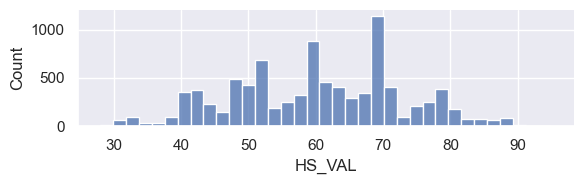

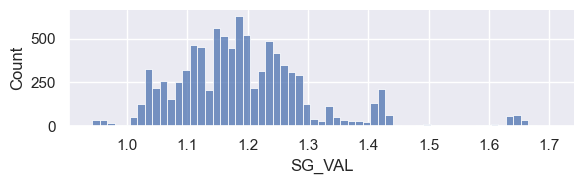

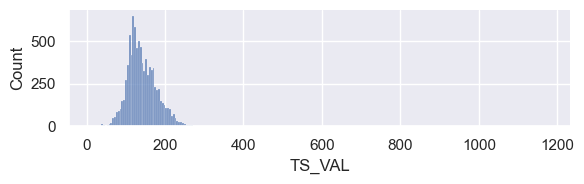

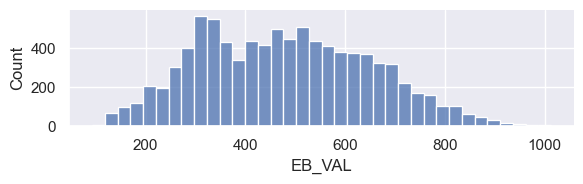

In [12]:
for yCol in trg_yCols:
    sns.displot(fin_df[yCol], height=2, aspect=3)